# PHASE 1 PROJECT

# AIRCRAFT-ANALYSIS

### Author: Julia Nyawira Maina

## Overview

Our company choosing to expand its portfolio to include aircraft, marks a significant move into the aviation sector. To ensure this venture aligns with our strategic objectives, we will leverage data-driven insights to guide our decision-making. A comprehensive risk analysis will be conducted using a database of aviation accidents from 1993 to 2023. This data will help identify trends, potential risks, and safety considerations for different aircraft types, enabling us to select the most suitable options to support our company's goals.

## Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Data Understanding

The dataset we are using is from Kaggle. It contains information from the National Transport Safety Board(NTSB), which includes data from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, as well as in international waters. This dataset provides insights on various factors involved in aircraft accidents such as weather conditions, aircraft make and model and more.

## Data Preparation

This data was cleaned using Jupyter Notebook. The python pandas library and numpy library were also imported for analysis. These are the steps taken to clean the data:
1. Importing relevant python libraries
2. Loading and reading the CSV file.
3. Inspecting and understanding the data.
4. Data cleaning.
5. In data cleaning, we checked for missing values and dropped some columns and rows with missing values.
6. We also filled in all the numerical columns with missing values with 0 and the categorical columns with 'Unknown'.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Load the Dataset

In [26]:
# Load the Aviation Dataset
df=pd.read_csv(r"C:\Users\Julie Maina\Documents\Aircraft-AnalysisProject\Aircraft-Analysis-Project\AviationData.csv", encoding='latin1', low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


 As seen above, our dataset has 88889 rows and 31 columns in total.

In [27]:
# Displays the first five rows of our dataframe
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [28]:
# Gives us a concise summary of our dataframe by giving us basic information concerning it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

From our findings above, we can see that our dataframe has 88889 entries and 31 coumns in total. We also have two data types namely object which are contained in 26 of our columns and float64 which are in 5 of our columns.

We can also see that the Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity, Aircraft.damage,Aircraft.Category,Registration.Number, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Schedule, Purpose.of.flight, Air.carrier, Total.Fatal.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Broad.phase.of.flight, Report.Status, Publication.Date columns all have missing values which we will need to deal with.


In [29]:
# Shows us the number of rows and columns in our dataframe
df.shape

(88889, 31)

In [30]:
# Shows the various columns in our dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [31]:
# Returns the index of the first and last row
df.index

RangeIndex(start=0, stop=88889, step=1)

In [32]:
# Returns the summary statistics of our dataframe
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## 2. Data Cleaning

In [33]:
# Gives the total number of null values in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [55]:
# Checks for duplicates in our dataframe
df.duplicated().sum()

0

We can see that our dataframe has no duplicates in it.

We will need to deal with our missing values. I have chosen to drop certain columns from our dataframe since they have too many missing values and so filling them in would not work.
I have also chosen to drop some rows containing missing values.

In [63]:
# Dropping certain columns from our dataframe
drop_cols=['Latitude', 'Longitude', 'Airport.Code', 'Schedule', 'Report.Status', 'Air.carrier', 'Aircraft.Category', 'FAR.Description','Publication.Date']
dropped_df= df.drop(columns=drop_cols)
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Name            52790 non-null  object 
 7   Injury.Severity         87889 non-null  object 
 8   Aircraft.damage         85695 non-null  object 
 9   Registration.Number     87572 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur.Built           88787 non-null  object 
 13  Number.of.Engines       82805 non-null  float64
 14  Engine.Type             81812 non-null

In [65]:
# Removes rows containing null values
dropped_df= dropped_df.dropna(axis='index', subset=['Location', 'Make', 'Model', 'Amateur.Built', 'Registration.Number', 'Engine.Type'])
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81324 entries, 0 to 88767
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                81324 non-null  object 
 1   Investigation.Type      81324 non-null  object 
 2   Accident.Number         81324 non-null  object 
 3   Event.Date              81324 non-null  object 
 4   Location                81324 non-null  object 
 5   Country                 81105 non-null  object 
 6   Airport.Name            50550 non-null  object 
 7   Injury.Severity         81131 non-null  object 
 8   Aircraft.damage         79390 non-null  object 
 9   Registration.Number     81324 non-null  object 
 10  Make                    81324 non-null  object 
 11  Model                   81324 non-null  object 
 12  Amateur.Built           81324 non-null  object 
 13  Number.of.Engines       79609 non-null  float64
 14  Engine.Type             81324 non-null

As seen above, I have chosen to drop some of our columns with extreme missing values and to also remove some of our rows with missing values. Now our dataset has a total of 22 columns and 81324 rows. Out of the 22 columns, 12 still contain missing values so lets keep working on that.

In [66]:
# Gives the total number of null values in each column
dropped_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                     219
Airport.Name              30774
Injury.Severity             193
Aircraft.damage            1934
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          1715
Engine.Type                   0
Purpose.of.flight          2790
Total.Fatal.Injuries      10393
Total.Serious.Injuries    11204
Total.Minor.Injuries      10512
Total.Uninjured            4930
Weather.Condition           886
Broad.phase.of.flight     20067
dtype: int64

Next, we want to work on filling in the missing values in our numerical and categorical columns.

In [67]:
# Filling in all the missing values in numerical columns with value=0 except for 'Number.of.Engines'
dropped_df[['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured']]=dropped_df[['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured']].fillna(value=0)
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81324 entries, 0 to 88767
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                81324 non-null  object 
 1   Investigation.Type      81324 non-null  object 
 2   Accident.Number         81324 non-null  object 
 3   Event.Date              81324 non-null  object 
 4   Location                81324 non-null  object 
 5   Country                 81105 non-null  object 
 6   Airport.Name            50550 non-null  object 
 7   Injury.Severity         81131 non-null  object 
 8   Aircraft.damage         79390 non-null  object 
 9   Registration.Number     81324 non-null  object 
 10  Make                    81324 non-null  object 
 11  Model                   81324 non-null  object 
 12  Amateur.Built           81324 non-null  object 
 13  Number.of.Engines       79609 non-null  float64
 14  Engine.Type             81324 non-null

In [68]:
# Filling in all the missing values in categorical columns with 'Unknown'
dropped_df[['Country', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight']]=dropped_df[['Country', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight']].fillna('Unknown')
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81324 entries, 0 to 88767
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                81324 non-null  object 
 1   Investigation.Type      81324 non-null  object 
 2   Accident.Number         81324 non-null  object 
 3   Event.Date              81324 non-null  object 
 4   Location                81324 non-null  object 
 5   Country                 81324 non-null  object 
 6   Airport.Name            81324 non-null  object 
 7   Injury.Severity         81324 non-null  object 
 8   Aircraft.damage         81324 non-null  object 
 9   Registration.Number     81324 non-null  object 
 10  Make                    81324 non-null  object 
 11  Model                   81324 non-null  object 
 12  Amateur.Built           81324 non-null  object 
 13  Number.of.Engines       79609 non-null  float64
 14  Engine.Type             81324 non-null

In [69]:
# Filling in the missing values in the column 'Number.of.Engines' with the median
dropped_df[['Number.of.Engines']]=dropped_df[['Number.of.Engines']].fillna(dropped_df['Number.of.Engines'].median())
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81324 entries, 0 to 88767
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                81324 non-null  object 
 1   Investigation.Type      81324 non-null  object 
 2   Accident.Number         81324 non-null  object 
 3   Event.Date              81324 non-null  object 
 4   Location                81324 non-null  object 
 5   Country                 81324 non-null  object 
 6   Airport.Name            81324 non-null  object 
 7   Injury.Severity         81324 non-null  object 
 8   Aircraft.damage         81324 non-null  object 
 9   Registration.Number     81324 non-null  object 
 10  Make                    81324 non-null  object 
 11  Model                   81324 non-null  object 
 12  Amateur.Built           81324 non-null  object 
 13  Number.of.Engines       81324 non-null  float64
 14  Engine.Type             81324 non-null

In [70]:
# Checking for null numbers in our dataframe
dropped_df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [73]:
dropped_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Fatal(2),Destroyed,NC6404,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Fatal(4),Destroyed,N5069P,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Fatal(3),Destroyed,N5142R,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Fatal(2),Destroyed,N1168J,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Unknown,Non-Fatal,Substantial,CF-TLU,...,No,2.0,Turbo Fan,Unknown,0.0,0.0,1.0,44.0,VMC,Climb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Private,Non-Fatal,Substantial,N18158,...,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Unknown
88647,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,GWINNETT COUNTY - BRISCOE FLD,Non-Fatal,Substantial,N2047Q,...,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Unknown
88661,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Ardmore Downtown Executive Air,Non-Fatal,Substantial,N2889W,...,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Unknown
88735,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,ELLINGTON,Minor,Substantial,N778MS,...,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,Unknown


Our dataframe now has 81324 entries and 22 columns. Now that we have dealt with all our missing values in our dataframe, we can move on to the next step.

## 3. Exploratory Data Analysis

## i) Bivariate Analysis 

This is analysis between two column variables.

### 1.

In [74]:
# Counting the frequency of unique values in the 'Weather.Condition' column
weather_condition_accidents=dropped_df.groupby('Weather.Condition').size().sort_values(ascending=False)
weather_condition_accidents

Weather.Condition
VMC        73940
IMC         5646
Unknown      886
UNK          687
Unk          165
dtype: int64

There are 3 kinds of weather conditions as seen above. 
1. VMC-short for Visual Meteorological Conditions, weather conditions that allow a pilot to navigate by visual reference to the ground and other landmarks i.e clear weather
2. IMC- short for Instrument Meteorological Conditions, weather conditions that require a pilot to rely on flight instruments i.e stormy or cloudy weather.
3. Unknown/UNK/Unk- all stand for unknown. Weather condition was not present in the report


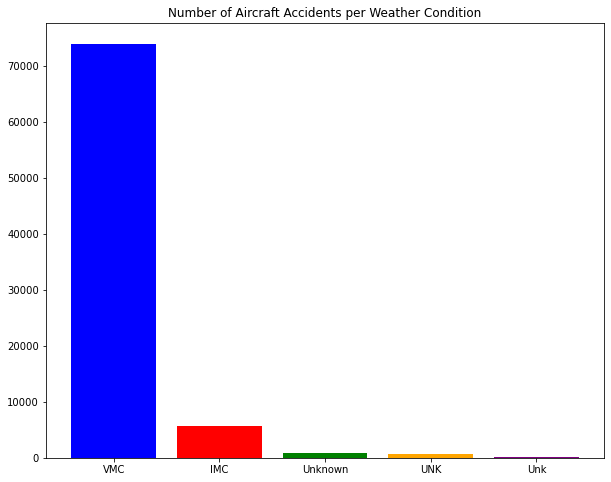

In [75]:
# Weather condition analysis for aircraft accidents
fig, ax= plt.subplots(figsize=(10,8))
ax.bar(x= weather_condition_accidents.index, height= weather_condition_accidents.values, color=['blue', 'red', 'green', 'orange', 'purple'])

# Set the xlabel
ax.set_xlabel=('WEATHER CONDITION')
# Set the ylabel
ax.set_ylabel=('ACCIDENTS')
# Set the title
ax.set_title('Number of Aircraft Accidents per Weather Condition')
# Plot the graph
plt.show()

From our analysis above, we can see that most accidents happened when the weather condition was VMC.

### 2.

In [76]:
# Lets analyse the number of accidents by location
accident_location= dropped_df.groupby('Location').size().sort_values(ascending=False).head(10)
accident_location

Location
ANCHORAGE, AK      434
MIAMI, FL          200
HOUSTON, TX        193
ALBUQUERQUE, NM    188
CHICAGO, IL        183
FAIRBANKS, AK      173
TUCSON, AZ         141
ORLANDO, FL        132
ENGLEWOOD, CO      131
PHOENIX, AZ        130
dtype: int64

We can see that most accidents happen in Anchorage, Miami and Houston as compared to the rest of the locations.

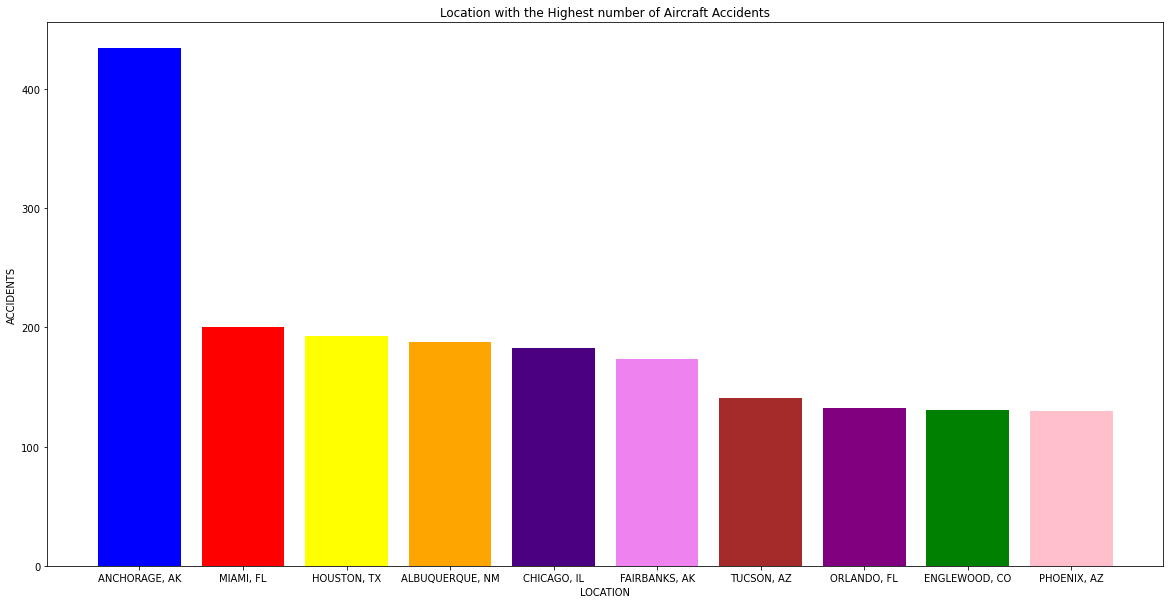

In [77]:
# Create figure and axis for plot
fig, ax= plt.subplots(figsize=(20,10))
ax.bar(x=accident_location.index, height= accident_location.values, color=['blue', 'red', 'yellow', 'orange', 'indigo', 'violet', 'brown', 'purple', 'green','pink'])

# Set the xlabel
ax.set_xlabel('LOCATION')
# Set the ylabel
ax.set_ylabel('ACCIDENTS')
# Set the title
ax.set_title('Location with the Highest number of Aircraft Accidents')
# Plot the graph
plt.show()

### 3.

In [78]:
# Lets categorise fatal injuries by make
make_fatalinjuries= dropped_df.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
make_fatalinjuries

Make
Cessna               6727.0
Piper                5036.0
Beech                2687.0
Boeing               2345.0
CESSNA               1190.0
PIPER                 886.0
Douglas               687.0
Bell                  684.0
Mcdonnell Douglas     644.0
Mooney                545.0
Name: Total.Fatal.Injuries, dtype: float64

From this we can see that Cessna has led to the most fatal injuries.

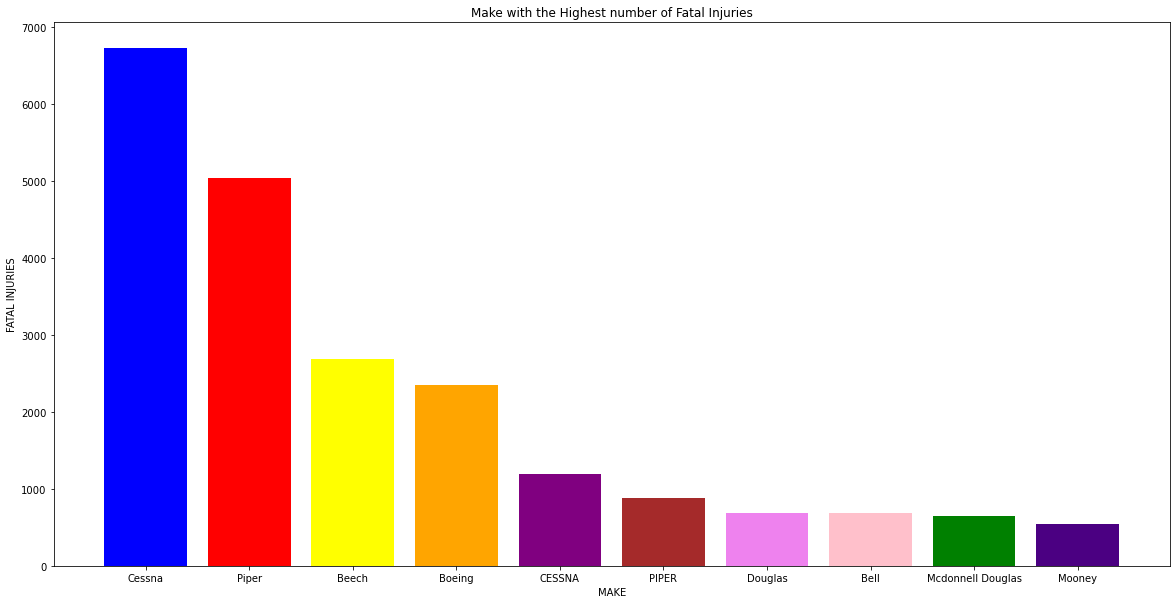

In [79]:
# Analysing the distribution between the make column and the total fatal injuries column
# Create figure and axis for plot
fig, ax= plt.subplots(figsize=(20,10))
ax.bar(x=make_fatalinjuries.index, height= make_fatalinjuries.values, color=['blue', 'red', 'yellow', 'orange', 'purple', 'brown', 'violet', 'pink', 'green', 'indigo'])

# Set the xlabel
ax.set_xlabel('MAKE')
# Set the ylabel
ax.set_ylabel('FATAL INJURIES')
# Set the title
ax.set_title('Make with the Highest number of Fatal Injuries')
# Plot the graph
plt.show()

### 4.

In [80]:
# Lets categorise fatal injuries by model
model_fatalinjuries= dropped_df.groupby('Model')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
model_fatalinjuries

Model
172N           405.0
152            365.0
PA-28-181      353.0
A36            325.0
PA-28-140      301.0
172            276.0
747-121        270.0
A300B4-605R    266.0
DC-8-63        263.0
PA-28-180      260.0
Name: Total.Fatal.Injuries, dtype: float64

We can see that the aircraft model-172N has the most fatal injuries.

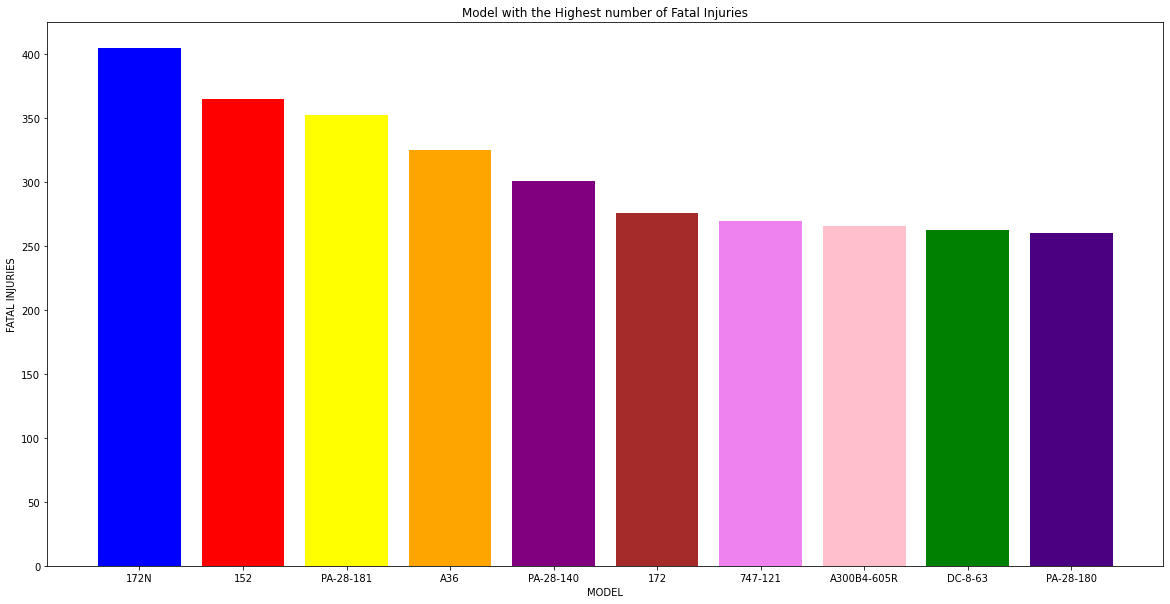

In [81]:
# Analysing the distribution between the model column and the total fatal injuries column
# Create figure and axis for plot
fig, ax= plt.subplots(figsize=(20,10))
ax.bar(x=model_fatalinjuries.index, height= model_fatalinjuries.values, color=['blue', 'red', 'yellow', 'orange', 'purple', 'brown', 'violet', 'pink', 'green', 'indigo'])

# Set the xlabel
ax.set_xlabel('MODEL')
# Set the ylabel
ax.set_ylabel('FATAL INJURIES')
# Set the title
ax.set_title('Model with the Highest number of Fatal Injuries')
# Plot the graph
plt.show()

### 5.

In [82]:
# Lets analyse the aircraft damage by total minor injuries
damage_minorinjuries= dropped_df.groupby('Aircraft.damage')['Total.Uninjured'].size().sort_values(ascending=False).head(20)
damage_minorinjuries

Aircraft.damage
Substantial    60378
Destroyed      16840
Minor           2166
Unknown         1940
Name: Total.Uninjured, dtype: int64

From this we can see that most people were uninjured when the aircraft damage was substantial.

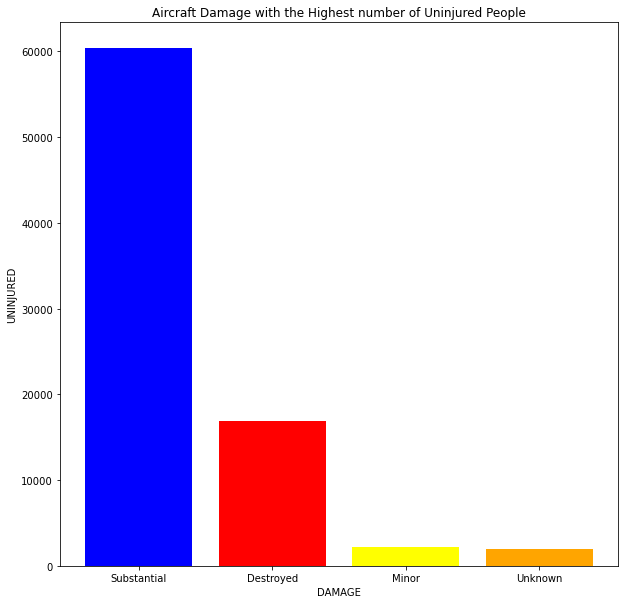

In [83]:
# Create figure and axis for plot
fig, ax= plt.subplots(figsize=(10,10))
ax.bar(x=damage_minorinjuries.index, height= damage_minorinjuries.values, color=['blue', 'red', 'yellow', 'orange'])

# Set the xlabel
ax.set_xlabel('DAMAGE')
# Set the ylabel
ax.set_ylabel('UNINJURED')
# Set the title
ax.set_title('Aircraft Damage with the Highest number of Uninjured People')
# Plot the graph
plt.show()

## ii) Multivariate Analysis

This is analysing more than 2 variable columns.

### 6.

In [84]:
# Analysing on number of accidents by number of engines
accidents_by_engines= pd.pivot_table(dropped_df, index= 'Number.of.Engines', values=['Investigation.Type'], aggfunc=np.size).reset_index()
accidents_by_engines

,Number.of.Engines,Investigation.Type
0,0.0,666
1,1.0,69345
2,2.0,10458
3,3.0,464
4,4.0,388
5,8.0,3


We can see that the aircrafts with 4 or less engines had the most accidents.

<function matplotlib.pyplot.show(close=None, block=None)>

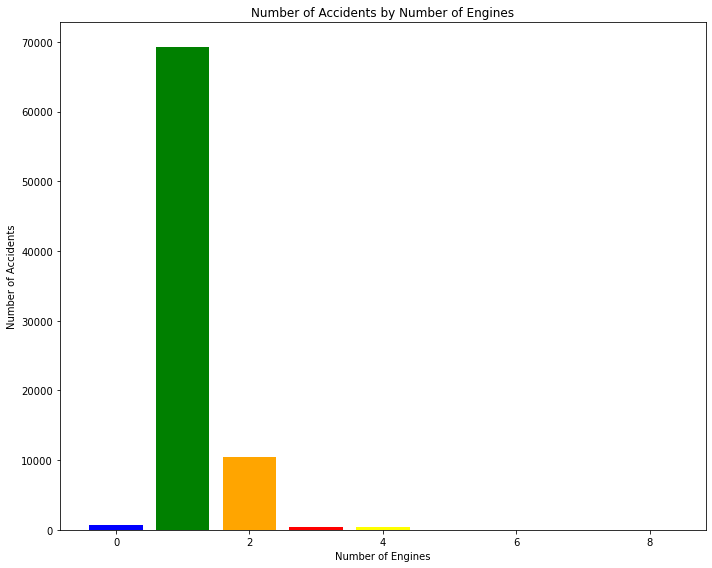

In [85]:
# Define data for plotting
x= accidents_by_engines['Number.of.Engines']
heights= accidents_by_engines['Investigation.Type']

# Create figure and axis for plot
fig, ax= plt.subplots(figsize=(10,8))
bars= ax.bar(x, heights, color=['blue', 'green', 'orange', 'red', 'yellow', 'purple'])

bar_chart_title='Number of Accidents by Number of Engines'
bar_chart_count_label='Number of Accidents'
bar_chart_series_label='Number of Engines'

# Set the title
ax.set_title(bar_chart_title)
# Set xlabel
ax.set_xlabel(bar_chart_series_label)
# Set ylabel
ax.set_ylabel(bar_chart_count_label)

# Plot the graph
plt.tight_layout()
plt.show

## 4. Conclusion


Based on the analysis we can conclude as follows:
1. Weather Condition: The weather conditions with the most accidents is VMC followed by IMC
2. Location: We can note that most accidents occur in Anchorage, Miami and Houston as compared to the other regions.
3. Aircraft make and model: We can conclude that most fatal injuries were caused by Cessna and model 172N. 
4. Aircraft damage: We can see that substanial damage has the highest number of uninjured people.
5. Number of engines: The aircrafts with 4 or less engines had the most accidents


## 5. Recommendations

1. Its notable that the weather conditionS more prone to accidents are VMC. Ensure the aircraft is equipped to handle all conditions for added safety.
2. Avoid high risk locations such as Anchorage, Miami and Houston and consider low risk routes.
3. Consider aircrafts with more than 4 engines if possible.
4. Avoid aircraft makes and models with high accident rates such as Cessna and Piper and 172N and 152.

In [86]:
# Saving the dataframe
dropped_df.to_csv('AviationData_Cleaned.csv', index=False)